In [1]:
%%writefile dash-board.html
<html>
<head>
  <!-- Plotly.js -->
  <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
  <link rel="stylesheet" href="dash-board.css">
</head>
<body>
<div class="header">
  <h1>I/O Dashboard</h1>
</div>

<!-- Plotly chart will be drawn inside this DIV -->
<div class="row">
<div id="graph_1" class="column" </div>
<script src="plot-1.js"></script>
</div>

<div id="graph_2" class="column" </div>
<script src="plot-2.js"></script>
</div>
</div>

</body>
</html>

Overwriting dash-board.html


In [2]:
%%writefile plot-1.js
var trace1 = {
type: 'bar',
x: [1, 2, 3, 4],
y: [5, 10, 2, 8],
marker: {
      color: '#C8A2C8',
      line: {
          width: 2.5
      }
  }
};

var data = [ trace1 ];

var layout = { 
  title: 'Responsive to window\'s size!',
  font: {size: 18},
  autosize: false,
  width: 500,
  height: 500,
  margin: {
    l: 50,
    r: 50,
    b: 100,
    t: 100,
    pad: 4}
};

var config = {responsive: true}

Plotly.newPlot('graph_1', data, layout, config );

Overwriting plot-1.js


In [3]:
%%writefile plot-2.js
const rand = () => Math.random();
var x = [1, 2, 3, 4, 5];
const new_data = (trace) => Object.assign(trace, {y: x.map(rand)});

// add random data to three line traces
var data = [
  {mode:'lines', line: {color: "#b55400"}}, 
  {mode: 'lines', line: {color: "#393e46"}},
  {mode: 'lines', line: {color: "#222831"}}
].map(new_data);

var layout = {
  title: 'User Zoom Persists<br>When uirevision Unchanged',
  uirevision:'true',
  autosize: false,
  width: 500,
  height: 500,
  margin: {
    l: 50,
    r: 50,
    b: 100,
    t: 100,
    pad: 4},
  xaxis: {autorange: true},
  yaxis: {autorange: true}
};

Plotly.react(graph_2, data, layout);

var myPlot = document.getElementById('graph_2');

var cnt = 0;
var interval = setInterval(function() {
  data = data.map(new_data);

  // user interation will mutate layout and set autorange to false
  // so we need to reset it to true
  layout.xaxis.autorange = true;
  layout.yaxis.autorange = true;
  
  // not changing uirevision will ensure that user interactions are unchanged
  // layout.uirevision = rand();
  
  Plotly.react(graph_2, data, layout);
  if(cnt === 100) clearInterval(interval);
}, 500);


Overwriting plot-2.js


In [4]:
%%writefile dash-board.css
<meta name="viewport" content="width=device-width, initial-scale=1">
<style>
* {
  box-sizing: border-box;
}

.row {
  display: flex;
}

.row:after {
  content: "";
  display: table;
  clear: both;
}
    
.column
{   
    float: left;
    width: 30%;
    padding: 10px;
    height: 300px;
}

body{
    background-color: #FFFFFF
}
/*remove standard list and bullet formatting from ul*/
.columns1 ul
{
    margin: 20px;
    padding: 0;
    list-style-type: none;
}

.header {
  padding: 6px;
  text-align: center;
  background: #1abc9c;
  color: white;
}

/* correct webkit/chrome uneven margin on the first column*/
</style>

Writing dash-board.css


In [ ]:
%%writefile database.js
var mysql = require('mysql');

var con = mysql.createConnection({
  host: "localhost",
  user: "root",
  password: "hasib"
});

con.connect(function(err) {
  if (err) throw err;
  console.log("Connected!");
});

In [ ]:
#conda install PyMySql, mysqlclient
#conda install mysql-connector-python

In [1]:
import pymysql

def mysqlconnect():
    conn = pymysql.connect(
        host='localhost',
        user='root',
        password = "hasib",
        db='IO-1',
        )

    cur = conn.cursor()
    cur.execute("select @@version")
    output = cur.fetchall()
    print(output)

    # To close the connection
    return conn#.close()

conn = mysqlconnect()

(('8.0.26',),)


In [4]:
import psycopg2
from psycopg2 import OperationalError

def create_connection(db_name, db_user, db_password, db_host, db_port):
    connection = None
    try:
        connection = psycopg2.connect(
            database=db_name,
            user=db_user,
            password=db_password,
            host=db_host,
            port=db_port,
        )
        print("Connection to PostgreSQL DB successful")
    except OperationalError as e:
        print(f"The error '{e}' occurred")
    return connection

db_name     = "io_db_1"
db_user     = "irfan"
db_password = "hasib"
db_host     = "127.0.0.1"
db_port     = "5432"
conn = create_connection(
    db_name, db_user, db_password, db_host, db_port
)
curr = conn.cursor()
conn.autocommit = True

Connection to PostgreSQL DB successful


In [5]:
#curr.execute("""CREATE DATABASE IO_DB_1;""")
#curr.execute("DROP DATABASE IO_1;")

In [26]:
try :
    print('Dropping table 1')
    create_table_query = """DROP TABLE TABLE_1;"""
    curr = conn.cursor()
    curr.execute(create_table_query)
    #conn.commit()
except: 0
print('Creating table 1')
create_table_query = """CREATE TABLE TABLE_1 (
    id SERIAL NOT NULL PRIMARY KEY,
    col_1 float,
    col_2 float,
    col_3 float,
    col_4 float);"""
curr = conn.cursor()
curr.execute(create_table_query)
#conn.commit()

Dropping table 1
Creating table 1


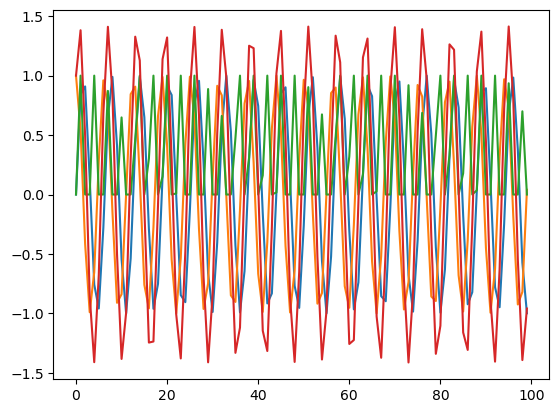

In [27]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(100)
a = np.sin(x)
b = np.cos(x)
c = np.clip(np.tan(x),0.0,1.0)
d = np.sin(x) + np.cos(x)
plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.plot(d)
plt.show()

In [28]:
for _a,_b,_c,_d in zip(a,b,c,d):
    curr.execute("INSERT INTO TABLE_1 (col_1,col_2,col_3,col_4) VALUES ({}, {} , {} , {} )".format(_a,_b,_c,_d))

In [29]:
curr.execute("""SELECT * FROM TABLE_1""")
data= curr.fetchall()
for tbl in data:
    print(tbl)

(1, 0.0, 1.0, 0.0, 1.0)
(2, 0.8414709848078965, 0.5403023058681398, 1.0, 1.3817732906760363)
(3, 0.9092974268256817, -0.4161468365471424, 0.0, 0.4931505902785393)
(4, 0.1411200080598672, -0.9899924966004454, 0.0, -0.8488724885405782)
(5, -0.7568024953079282, -0.6536436208636119, 1.0, -1.4104461161715403)
(6, -0.9589242746631385, 0.28366218546322625, 0.0, -0.6752620891999122)
(7, -0.27941549819892586, 0.960170286650366, 0.0, 0.6807547884514401)
(8, 0.6569865987187891, 0.7539022543433046, 0.8714479827243188, 1.4108888530620938)
(9, 0.9893582466233818, -0.14550003380861354, 0.0, 0.8438582128147682)
(10, 0.4121184852417566, -0.9111302618846769, 0.0, -0.49901177664292035)
(11, -0.5440211108893698, -0.8390715290764524, 0.6483608274590866, -1.383092639965822)
(12, -0.9999902065507035, 0.004425697988050785, 0.0, -0.9955645085626527)
(13, -0.5365729180004349, 0.8438539587324921, 0.0, 0.3072810407320572)
(14, 0.4201670368266409, 0.9074467814501962, 0.4630211329364896, 1.327613818276837)
(15, 0.9

In [31]:
def get_schema_names():
    curr.execute("""SELECT SCHEMA_NAME FROM INFORMATION_SCHEMA.SCHEMATA""")
    data= curr.fetchall()
    for tbl in data:
        print(tbl)   
get_schema_names()

('pg_toast',)
('pg_catalog',)
('public',)
('information_schema',)


In [32]:
def get_table_names():
    curr.execute("""SELECT TABLE_NAME,TABLE_SCHEMA FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_SCHEMA = 'public'""")
    data= curr.fetchall()
    for tbl in data:
        print(tbl)
get_table_names()

('table_1', 'public')


In [36]:
curr.execute("""SELECT COLUMN_NAME FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = N'table_1'""")
data= curr.fetchall()
for tbl in data:
    print(tbl)

('id',)
('col_1',)
('col_2',)
('col_3',)
('col_4',)


In [10]:
%%writefile node-server.js
var http = require('http');

http.createServer(function (req, res) {
  res.writeHead(200, {'Content-Type': 'text/html'});
  res.end('Hello World!');
}).listen(8010);

Overwriting node-server.js


Connection to PostgreSQL DB successful


In [ ]:
connection.